In [4]:
### Problem 1

# Define the function and its derivative as given in HW 1 Problem 1
import numpy as np
import matplotlib.pyplot as plt
import time
import timeit

# we know the desired root is r ≈ 0.641583, this is in the open interval (0,1)


r = 0.641583 # desired result

def func(x):   #the given function
    return (np.exp(-x**3) - x**4 - np.sin(x) )

def dfunc(x): #the given function's first derivative (for Newton's method)
    return (-3.0*x**2 * np.exp(-x**3) - 4.0*x**3 - np.cos(x))

In [2]:
# part (1): Bisection method
# the initial interval is given to be a_0 = -1, b_0 = 1

a0 = -1.0
b0 = 1.0 

iters = 15 #number of iterations; note: one could use a while loop and impose a convergence condition on xc
# However, we are interested in the number of iterations
initial_time = time.time() # keep track of runtime
for i in range(iters):
    x_c = 0.5*(a0 + b0)  # calculate midpoint, 2 FLOPS
    fa0 = func(a0) # ~170 FLOPS
    fxc = func(x_c)  # ~170 FLOPS
    if fa0*fxc < 0.0:  # 1 FLOP    check if the sign of the function changes in left half
        a0 = a0  # 1 FLOP   reassign the limits of the interval
        b0 = x_c  # 1 FLOP
    else:
        a0 = x_c # 1 FLOP
        b0 = b0  #1 FLOP
    
final_time = time.time()
total_time = final_time - initial_time
    
print('The estimated root by the bisection method after ' + str(iters) + ' iterations is: ' + str(x_c))
print('Error: ' + str(np.abs(x_c - r)))
print('The runtime for this method is: ' + str(total_time) + ' seconds')


# 15 iterations is the minimum number required to satisfy the assignments accuracy condition
# Total of ~ 5200 FLOPS

The estimated root by the bisection method after 15 iterations is: 0.64154052734375
Error: 4.2472656250014396e-05
The runtime for this method is: 0.0006477832794189453 seconds


In [3]:
# part (2): Newton's method

x0 = 0.0 # initial root

iters = 5
initial_time = time.time()

for i in range(iters):
    x0 = x0 - func(x0)/dfunc(x0) # ~ 170 + 170 + 3 FLOPS per iteration, perform one Newton step

final_time = time.time()
total_time = final_time - initial_time

print("The estimated root by Newton's method after " + str(iters) + ' iterations is: ' + str(x0))
print('Error: ' + str(np.abs(x0 - r)))
print('The runtime for this method is: ' + str(total_time) + ' seconds')


# 5 iterations is the minimum number required to satisfy the accurac condition
# A total number of ~ 1700 FLOPS

The estimated root by Newton's method after 5 iterations is: 0.6415825512515503
Error: 4.487484497328609e-07
The runtime for this method is: 0.0003638267517089844 seconds


In [4]:
# part (3): secant method

x0 = -1.0
x1 = 1.0  # initial roots

iters = 6
initial_time = time.time()

for i in range(iters):
    x2 = x1 - (x1 - x0)*(func(x1)/(  (func(x1) - func(x0)) )) # ~ 170*3 + 6 FLOPS, perform one secant step
    x0 = x1 # 1 FLOP reassign evaluation points
    x1 = x2 # 1 FLOP


final_time = time.time()
total_time = final_time - initial_time

print("The estimated root by the Secant method after " + str(iters) + ' iterations is: ' + str(x2))
print('Error: ' + str(np.abs(x2 - r)))
print('The runtime for this method is: ' + str(total_time) + ' seconds')
  
# minimum of 6 iterations needed to reach required accuracy
# ~ 3100 FLOPS 

The estimated root by the Secant method after 6 iterations is: 0.6415908941839591
Error: 7.894183959078482e-06
The runtime for this method is: 0.0003178119659423828 seconds


In [5]:
# part (4): Monte Carlo method

x0 = 0.50 # initial minimum from which random numbers can be drawn
x1 = 0.75 # initial maximum from which random numbers can be drawn
iters  = 69
np.random.seed(2) # set seed for reporducibility
initial_time = time.time()
for i in range(iters):
    new_numbers = np.random.uniform(x0, x1, 2) # 2 FLOPS
    # determine if the function's sign flips between the two randomly drawn points
    if func(new_numbers[0])*func(new_numbers[1]) < 0.0: # ~ 170*2 + 1 FLOPS
        x0 = np.min(new_numbers) # 1 FLOP
        x1 = np.max(new_numbers) # 1 FLOP
        
x = 0.5*(x0 + x1) # 2 FLOPS # take the midpoint of the random interval
    
final_time = time.time()
total_time = final_time - initial_time  
print("The estimated root by the Monte Carlo method after " + str(iters) + ' iterations is: ' + str(x))
print('Error: ' + str(np.abs(x - r)))
print('The runtime for this method is: ' + str(total_time) + ' seconds')

# minimum of 69 iterations needed (with this seed) to obtain desired accuracy
# ~  23800 FLOPS in total

The estimated root by the Monte Carlo method after 69 iterations is: 0.6415684822671894
Error: 1.4517732810581663e-05
The runtime for this method is: 0.0025451183319091797 seconds


In [ ]:
### Problem 2

P_4(t=6) = 452.0000000000555
Runtime: 0.0009899139404296875 seconds


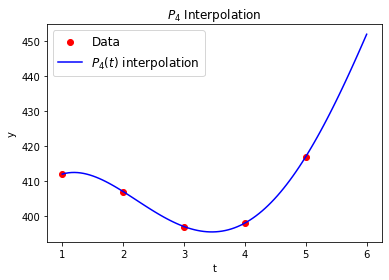

In [26]:
#part (1)

import numpy as np
import time
# assmeble information known ahead of time before implementing algorithm
data = np.array([[1, 412], [2, 407], [3, 397], [4, 398], [5, 417]]) # the dataset as ordered pairs 
power = 4 #highest exponent in interpolation
def P(x, power1, coefficients1): # interpolate point x with maximum exponent in polynomial interpolation 'power'
    y = 0.0
    power1 = int(power1) # ensure that we raise floats to integers only
    for i in range(power1+1):
        y += coefficients1[i]* x**(power1-i) # calculate the interpolation, one term at a time
    return y

initial_time = time.time() # keep track of runtime
# implement algorithm for finding the interpolation coefficients
matrix = np.zeros((data.shape[0], power+1)) #set up matrix for inversion
for i in range(data.shape[0]): #try to make the program as general as possible for any dataset and interpolation
    for j in range(power+1):
        matrix[i, j] += data[i,0]**(power-j)      
coefficients = np.matmul(np.linalg.inv(matrix), np.delete(data, 0, axis = 1 )) #compute interpolation coefficients
result = P(6.0, power, coefficients) # calculate the desired result 

final_time = time.time()
total_time = final_time - initial_time
plt.title(r'$P_4$ Interpolation')
plt.xlabel('t')
plt.ylabel('y')
plt.scatter(np.delete(data, 1, axis = 1 ), np.delete(data, 0, axis = 1 ), color='red', label='Data')
x_range = np.linspace(1.0, 6.0, 100)
plt.plot(x_range, P(x_range, 4, coefficients), color='blue', label=r'$P_4(t)$ interpolation')
plt.legend(fontsize = 12)
plt.savefig('./P4_interpolation.png')
print('P_4(t=6) = ' + str(result[0]))

print('Runtime: ' + str(total_time) + ' seconds')

In [2]:
import numpy as np
import timeit
import time



fp_time = timeit.timeit('3.0*3.0', number = 10000)
print(fp_time/10000.0)

2.876670000091508e-08


In [3]:

fp_time = timeit.timeit('3.0*3.0', number = 100000)
print(fp_time/100000.0)

3.029333000000634e-08


In [ ]:
# one flop is ~ 3e-8 s

In [8]:
import time

initial_time = time.time()

for i in range(10000):
    func(0.0)
    
final_time = time.time()
total_time = final_time - initial_time
print(total_time/10000)

# one function call is ~ 5e-6 s

4.889988899230957e-06


In [9]:
print(5.0e-6 / 3.0e-8)

166.66666666666669


In [ ]:
# about 170 flops per function call

Q_2(t = 6) = 436.00000000000546
Runtime: 0.0009610652923583984 seconds


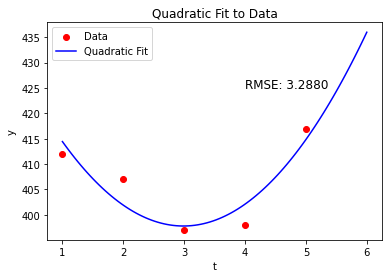

In [28]:
### Problem 2 part 2

data = np.array([[1, 412], [2, 407], [3, 397], [4, 398], [5, 417]])
matrix = np.zeros((data.shape[0], 3))
b = np.delete(data, 0, axis = 1 )

###
initial_time = time.time()
for i in range(data.shape[0]): # construct the needed matrix for least-squares fitting
    matrix[i, 0] += 1.0
    matrix[i, 1] += data[i, 0]
    matrix[i,2] += data[i,0]**2
    
    
# implement closed-form solution for OLS without regularization (i.e., assuming invertibility of matrices)  
quad_coefficients = np.matmul(np.linalg.inv(np.matmul(matrix.transpose(), matrix)) ,   np.matmul(matrix.transpose(), np.delete(data, 0, axis = 1 )))
    
def quad_fit(x, coefficients):
    return ( coefficients[0] + coefficients[1]*x + coefficients[2]*x**2)

prediction = quad_fit(6.0, quad_coefficients) # make prediction asked in problem
final_time = time.time() 
###

total_time = final_time - initial_time
print('Q_2(t = 6) = ' + str(prediction[0]))
print('Runtime: ' + str(total_time) + ' seconds')
# calculate rmse
rmse=np.sqrt(np.sum(np.power(quad_fit(np.delete(data,1,axis=1),quad_coefficients)-np.delete(data,0,axis=1),2))/(data.shape[0]))   
plt.title('Quadratic Fit to Data')
plt.xlabel('t')
plt.ylabel('y')
plt.scatter(np.delete(data, 1, axis = 1 ), np.delete(data, 0, axis = 1 ), label='Data', color='red')
x_range = np.linspace(1.0, 6.0, 100)
plt.plot(x_range, quad_fit(x_range, quad_coefficients), color='blue', label='Quadratic Fit')
plt.text(4, 425, 'RMSE: ' + str(rmse)[:6], fontsize = 12)
plt.legend()


plt.savefig('./quadratic_fit.png')